Kuo Yang, Lab 5, 11/9/25  
CS 121/Python DSML  
East Los Angeles College, FA 2025

***
Same as Lab4a (midterm), but with added plots  
Changes:
1) added plots
2) cleaned weight variable, "Weight1"
3) cleaned FDA report date, as year, "Year1"

Question on the end re: log scales
***

In [331]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Part 1: Creating and exploring pandas data series

In [332]:
glp1=pd.read_csv('glp1df.csv') #not sure why, but if I include encoding='latin1' I lose some data in api1 column
print(glp1.shape)

(300554, 25)


In [333]:
glp1.head()

,Case ID,Suspect Product Names,Suspect Product Active Ingredients,Reason for Use,Reactions,Serious,Outcomes,Sex,Event Date,Latest FDA Received Date,...,Report Source,Concomitant Product Names,Latest Manufacturer Received Date,Initial FDA Received Date,Country where Event occurred,Reported to Manufacturer?,Manufacturer Control Number,Literature Reference,Compounded Flag,api1
0,25142581,Trulicity,Dulaglutide,Product Used For Unknown Indication,Injection Site Pain,Non-Serious,Non-Serious,Male,-,31-MAR-2025,...,Not Specified,-,24-MAR-2025,31-MAR-2025,US,Not Specified,US-ELI_LILLY_AND_COMPANY-US202503021448,-,-,1
1,25142580,Trulicity,Dulaglutide,Type 2 Diabetes Mellitus,Visual Impairment;Product Storage Error,Non-Serious,Non-Serious,Female,-,31-MAR-2025,...,Not Specified,-,24-MAR-2025,31-MAR-2025,US,Not Specified,US-ELI_LILLY_AND_COMPANY-US202503021444,-,-,1
2,25141349,Trulicity,Dulaglutide,Product Used For Unknown Indication,Inappropriate Schedule Of Product Administrati...,Non-Serious,Non-Serious,Male,25-MAR-2025,31-MAR-2025,...,Not Specified,-,28-MAR-2025,31-MAR-2025,US,Not Specified,US-ELI_LILLY_AND_COMPANY-US202503025775,-,-,1
3,25140677,Trulicity,Dulaglutide,Type 2 Diabetes Mellitus,Depression;Decreased Appetite;Schizophrenia;Ma...,Serious,Hospitalized,Female,DEC-2024,31-MAR-2025,...,Not Specified,-,25-MAR-2025,31-MAR-2025,JP,Not Specified,JP-ELI_LILLY_AND_COMPANY-JP202503002636,-,-,1
4,25140673,Trulicity,Dulaglutide,Product Used For Unknown Indication,Paraesthesia,Non-Serious,Non-Serious,Female,-,31-MAR-2025,...,Not Specified,-,27-MAR-2025,31-MAR-2025,US,Not Specified,US-ELI_LILLY_AND_COMPANY-US202503024471,-,-,1


In [334]:
glp1.columns

Index(['Case ID', 'Suspect Product Names',
       'Suspect Product Active Ingredients', 'Reason for Use', 'Reactions',
       'Serious', 'Outcomes', 'Sex', 'Event Date', 'Latest FDA Received Date',
       'Case Priority', 'Patient Age', 'Patient Weight', 'Sender',
       'Reporter Type', 'Report Source', 'Concomitant Product Names',
       'Latest Manufacturer Received Date', 'Initial FDA Received Date',
       'Country where Event occurred', 'Reported to Manufacturer?',
       'Manufacturer Control Number', 'Literature Reference',
       'Compounded Flag', 'api1'],
      dtype='object')

## <span style="color:red;">Standardizing Year. (Courtesy of Ramirez,J of ELAC) </span>


In [335]:

UNIT_MAP = {
    'yr': 'year', 'yrs': 'year', 'y': 'year', 'year': 'year', 'years': 'year',
    'day': 'day', 'days': 'day', 'd': 'day',
    'week': 'week', 'weeks': 'week', 'wk': 'week', 'wks': 'week',
    'mth': 'month', 'mon': 'month', 'month': 'month', 'months': 'month', 'mo': 'month',
    'dec': 'decade', 'decade': 'decade', 'decades': 'decade'
}

In [336]:
import re

def parse_age_to_years(val):
    # handle missing/unknown
    if pd.isna(val):
        return np.nan
    s = str(val).strip().lower()
    if s in ('', 'nan', 'none', 'not specified', 'unknown'):
        return np.nan

    # grab first number (allow decimals)
    mnum = re.search(r'(\d+(\.\d+)?)', s)
    if not mnum:
        return np.nan
    num = float(mnum.group(1))

    # find a recognizable unit token, prefer the last token in the string
    toks = re.findall(r'[a-z]+', s)
    unit_std = None
    for tok in reversed(toks):
        if tok in UNIT_MAP:
            unit_std = UNIT_MAP[tok]
            break

    # convert to years
    if unit_std in (None, 'year'):
        years = num
    elif unit_std == 'month':
        years = num / 12.0
    elif unit_std == 'week':
        years = num / 52.0
    elif unit_std == 'day':
        years = num / 365.0
    elif unit_std == 'decade':
        years = num * 10.0
    else:
        years = np.nan

    return years

## <span style="color:red;">Age_Years (Courtesy of Ramirez,J, ELAC) </span>


In [337]:
glp1['Age_Years'] = glp1['Patient Age'].apply(parse_age_to_years)
print(glp1[['Patient Age', 'Age_Years']])


       Patient Age  Age_Years
0            80 YR       80.0
1            80 YR       80.0
2            85 YR       85.0
3            71 YR       71.0
4            63 YR       63.0
...            ...        ...
300549       55 YR       55.0
300550       32 YR       32.0
300551       49 YR       49.0
300552       74 YR       74.0
300553       32 YR       32.0

[300554 rows x 2 columns]


Compounded Data Map (new column: CMPD)

In [338]:
glp1['Compounded Flag'].unique()

array(['-', 'Yes'], dtype=object)

In [339]:
#create column cmpd, where 1=yes, 2=no (-)
glp1['CMPD'] = glp1['Compounded Flag'].map({'Yes': 1, '-': 0})

In [340]:
glp1.head()

,Case ID,Suspect Product Names,Suspect Product Active Ingredients,Reason for Use,Reactions,Serious,Outcomes,Sex,Event Date,Latest FDA Received Date,...,Latest Manufacturer Received Date,Initial FDA Received Date,Country where Event occurred,Reported to Manufacturer?,Manufacturer Control Number,Literature Reference,Compounded Flag,api1,Age_Years,CMPD
0,25142581,Trulicity,Dulaglutide,Product Used For Unknown Indication,Injection Site Pain,Non-Serious,Non-Serious,Male,-,31-MAR-2025,...,24-MAR-2025,31-MAR-2025,US,Not Specified,US-ELI_LILLY_AND_COMPANY-US202503021448,-,-,1,80.0,0
1,25142580,Trulicity,Dulaglutide,Type 2 Diabetes Mellitus,Visual Impairment;Product Storage Error,Non-Serious,Non-Serious,Female,-,31-MAR-2025,...,24-MAR-2025,31-MAR-2025,US,Not Specified,US-ELI_LILLY_AND_COMPANY-US202503021444,-,-,1,80.0,0
2,25141349,Trulicity,Dulaglutide,Product Used For Unknown Indication,Inappropriate Schedule Of Product Administrati...,Non-Serious,Non-Serious,Male,25-MAR-2025,31-MAR-2025,...,28-MAR-2025,31-MAR-2025,US,Not Specified,US-ELI_LILLY_AND_COMPANY-US202503025775,-,-,1,85.0,0
3,25140677,Trulicity,Dulaglutide,Type 2 Diabetes Mellitus,Depression;Decreased Appetite;Schizophrenia;Ma...,Serious,Hospitalized,Female,DEC-2024,31-MAR-2025,...,25-MAR-2025,31-MAR-2025,JP,Not Specified,JP-ELI_LILLY_AND_COMPANY-JP202503002636,-,-,1,71.0,0
4,25140673,Trulicity,Dulaglutide,Product Used For Unknown Indication,Paraesthesia,Non-Serious,Non-Serious,Female,-,31-MAR-2025,...,27-MAR-2025,31-MAR-2025,US,Not Specified,US-ELI_LILLY_AND_COMPANY-US202503024471,-,-,1,63.0,0


Clean Initial FDA Date ("Year1" column)

In [341]:
glp1['Year1']=glp1['Initial FDA Received Date'].str[-4:].astype(int)

Clean Weight Column ("Weight2")

In [342]:
glp1['Weight1']=pd.to_numeric(glp1['Patient Weight'].str.replace('[^\\d.]','',regex=True),errors='coerce')

Serious vs. Non-Serious Rxns

In [343]:
glp1_srscnt=glp1[['Case ID','Serious']]
glp1_srscnt2=glp1_srscnt.groupby('Serious',as_index=False).count()
print(glp1_srscnt2)

       Serious  Case ID
0  Non-Serious   222536
1      Serious    78018


### All Cases (Serious & Non-Serious)

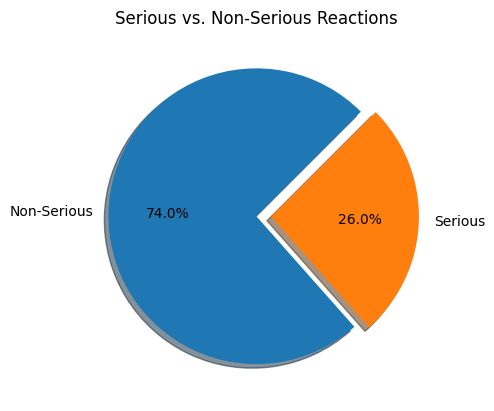

In [344]:
#pie chart 1 (serious+nonserious cases overall)
plt.pie(glp1_srscnt2['Case ID'],labels=glp1_srscnt2['Serious'],
        autopct='%1.1f%%',startangle=45,explode=(0,0.1),shadow=True)
plt.title('Serious vs. Non-Serious Reactions')
%matplotlib inline

Most Reactions were nonserious reactions, though serious events made up a significant proportion at 26%

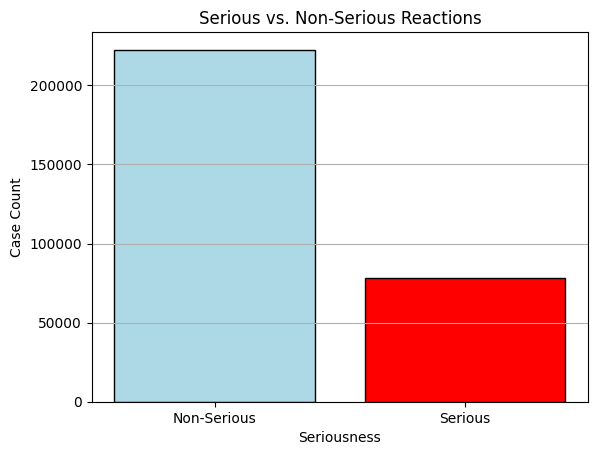

In [345]:
#bar chart 1 (serious+nonserious cases overall)
bar1=plt.bar(glp1_srscnt2['Serious'],glp1_srscnt2['Case ID'],
        color=['lightblue','red'],edgecolor='black')
plt.title('Serious vs. Non-Serious Reactions')
plt.xlabel('Seriousness')
plt.ylabel('Case Count')
plt.grid(axis='y')
%matplotlib inline

Looking from a bar plot, Serious cases (red), though less than non-serious, are still significant.

###Time-Series of All Cases

In [346]:
# Time Series
#glp1_time1 = glp1.groupby(['Serious','Year1'],as_index=False)['Case ID'].count()
glp1_time1_pt = pd.pivot_table(glp1,index='Year1',columns='Serious',values='Case ID',aggfunc='count',margins=True)
glp1_time1_pt1 = glp1_time1_pt.reset_index()
glp1_time1_pt2 = glp1_time1_pt1.iloc[:-1]
print(glp1_time1_pt2)

Serious Year1  Non-Serious  Serious    All
0        1984          2.0      NaN      2
1        1985          1.0      NaN      1
2        1999          1.0      NaN      1
3        2002          5.0      NaN      5
4        2003         17.0      NaN     17
5        2004          4.0      1.0      5
6        2005       1873.0    183.0   2056
7        2006      12288.0    637.0  12925
8        2007      11780.0   1008.0  12788
9        2008       6189.0   1548.0   7737
10       2009         53.0   1635.0   1688
11       2010       2208.0   2162.0   4370
12       2011       4262.0   2540.0   6802
13       2012       3853.0   2577.0   6430
14       2013       3859.0   2353.0   6212
15       2014       3132.0   2496.0   5628
16       2015       7179.0   3016.0  10195
17       2016       7186.0   2845.0  10031
18       2017       8694.0   2760.0  11454
19       2018      10632.0   3712.0  14344
20       2019      11144.0   4458.0  15602
21       2020      13529.0   4638.0  18167
22       20

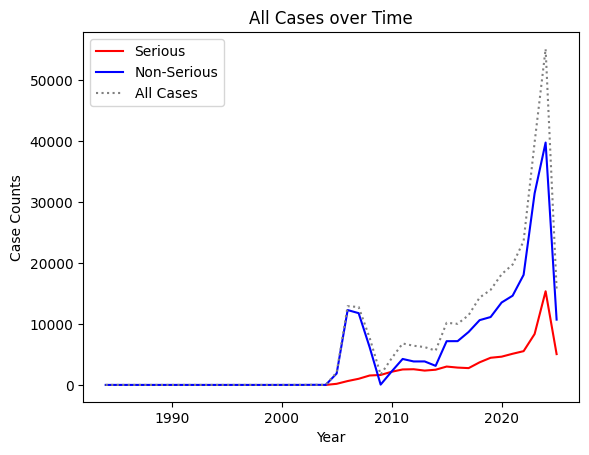

In [347]:
plt.plot(glp1_time1_pt2['Year1'],glp1_time1_pt2['Serious'],color='red',label='Serious')
plt.plot(glp1_time1_pt2['Year1'],glp1_time1_pt2['Non-Serious'],color='blue',
         label='Non-Serious')
plt.plot(glp1_time1_pt2['Year1'],glp1_time1_pt2['All'],color='gray',
         label='All Cases',linestyle='dotted')
plt.title("All Cases over Time")
plt.xlabel("Year")
plt.ylabel("Case Counts")
plt.legend()
%matplotlib inline


Number of cases increased dramatically since 2020, for both serious and non-serious cases over time. Please note that the last year, 2025, contained incomplete data (hence the steep dropoff). The overall increase reflects the increased use of GLP-1s overall.

###Age and Weight Correlation

In [348]:
#create age vs weight dataset
glp1_agewt=glp1[['Age_Years','Weight1','Serious','Sex','Year1']]
#filter in age between 0 and 150, weight <300kg
glp1_agewt2=glp1_agewt.query('Age_Years > 0 & Age_Years < 150 & Weight1 < 300')
print(glp1_agewt2)

        Age_Years  Weight1      Serious     Sex  Year1
7            44.0   79.365      Serious  Female   2025
12           89.0   86.168  Non-Serious  Female   2025
18           62.0   77.564  Non-Serious  Female   2025
49           41.0  136.050      Serious  Female   2025
50           69.0  150.000      Serious  Female   2025
...           ...      ...          ...     ...    ...
300549       55.0   67.500      Serious  Female   2025
300550       32.0   92.250      Serious  Female   2024
300551       49.0   62.550      Serious  Female   2024
300552       74.0   86.400  Non-Serious  Female   2024
300553       32.0   93.600      Serious  Female   2024

[51836 rows x 5 columns]


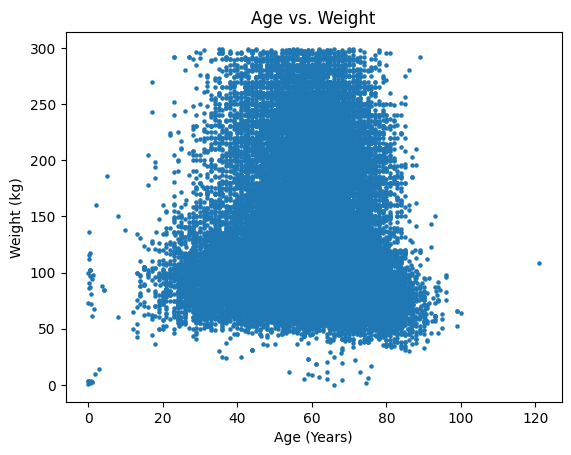

In [349]:
plt.scatter(glp1_agewt2['Age_Years'],glp1_agewt2['Weight1'],s=5)
plt.title('Age vs. Weight')
plt.xlabel('Age (Years)')
plt.ylabel('Weight (kg)')
plt.show()

No correlation between age and weight.

In [350]:
#Query method for Serious, Non-Serious Reactions
glp1_s=glp1.query("Serious == 'Serious'")
glp1_ns=glp1.query("Serious == 'Non-Serious'")
print('Serious:',glp1_s.shape, '\t |non-serious: ', glp1_ns.shape)

Serious: (78018, 29) 	 |non-serious:  (222536, 29)


In [351]:
glp1_s.head()

,Case ID,Suspect Product Names,Suspect Product Active Ingredients,Reason for Use,Reactions,Serious,Outcomes,Sex,Event Date,Latest FDA Received Date,...,Country where Event occurred,Reported to Manufacturer?,Manufacturer Control Number,Literature Reference,Compounded Flag,api1,Age_Years,CMPD,Year1,Weight1
3,25140677,Trulicity,Dulaglutide,Type 2 Diabetes Mellitus,Depression;Decreased Appetite;Schizophrenia;Ma...,Serious,Hospitalized,Female,DEC-2024,31-MAR-2025,...,JP,Not Specified,JP-ELI_LILLY_AND_COMPANY-JP202503002636,-,-,1,71.0,0,2025,NaN
7,25139513,Trulicity;Ozempic,Semaglutide;Dulaglutide,Blood Cholesterol Increased;Gastrooesophageal ...,Decreased Appetite;Impaired Gastric Emptying,Serious,Other Outcomes;Hospitalized,Female,01-DEC-2022,31-MAR-2025,...,US,Not Specified,US-NOVOPROD-1319160,-,-,1,44.0,0,2025,79.365
17,25138176,Trulicity;Ozempic,Semaglutide;Dulaglutide,Product Used For Unknown Indication,Nausea;Impaired Gastric Emptying;Diarrhoea;Vom...,Serious,Other Outcomes,Not Specified,-,30-MAR-2025,...,US,Not Specified,US-ELI_LILLY_AND_COMPANY-US202503024418,-,-,1,66.0,0,2025,NaN
20,25140295,-,Dulaglutide,Diabetes Mellitus,Pancreatitis Acute,Serious,Required Intervention;Hospitalized,Male,16-OCT-2024,28-MAR-2025,...,Not Specified,Not Specified,-,-,-,1,74.0,0,2025,NaN
21,25137010,Trulicity,Dulaglutide,Product Used For Unknown Indication;Type 2 Dia...,Macular Degeneration,Serious,Other Outcomes,Male,-,28-MAR-2025,...,US,Not Specified,US-ELI_LILLY_AND_COMPANY-US202503017503,-,-,1,83.0,0,2025,NaN


In [352]:
glp1_ns.head()

,Case ID,Suspect Product Names,Suspect Product Active Ingredients,Reason for Use,Reactions,Serious,Outcomes,Sex,Event Date,Latest FDA Received Date,...,Country where Event occurred,Reported to Manufacturer?,Manufacturer Control Number,Literature Reference,Compounded Flag,api1,Age_Years,CMPD,Year1,Weight1
0,25142581,Trulicity,Dulaglutide,Product Used For Unknown Indication,Injection Site Pain,Non-Serious,Non-Serious,Male,-,31-MAR-2025,...,US,Not Specified,US-ELI_LILLY_AND_COMPANY-US202503021448,-,-,1,80.0,0,2025,NaN
1,25142580,Trulicity,Dulaglutide,Type 2 Diabetes Mellitus,Visual Impairment;Product Storage Error,Non-Serious,Non-Serious,Female,-,31-MAR-2025,...,US,Not Specified,US-ELI_LILLY_AND_COMPANY-US202503021444,-,-,1,80.0,0,2025,NaN
2,25141349,Trulicity,Dulaglutide,Product Used For Unknown Indication,Inappropriate Schedule Of Product Administrati...,Non-Serious,Non-Serious,Male,25-MAR-2025,31-MAR-2025,...,US,Not Specified,US-ELI_LILLY_AND_COMPANY-US202503025775,-,-,1,85.0,0,2025,NaN
4,25140673,Trulicity,Dulaglutide,Product Used For Unknown Indication,Paraesthesia,Non-Serious,Non-Serious,Female,-,31-MAR-2025,...,US,Not Specified,US-ELI_LILLY_AND_COMPANY-US202503024471,-,-,1,63.0,0,2025,NaN
5,25140096,Trulicity,Dulaglutide,Product Used For Unknown Indication,Injection Site Bruising;Incorrect Dose Adminis...,Non-Serious,Non-Serious,Female,MAR-2025,31-MAR-2025,...,US,Not Specified,US-ELI_LILLY_AND_COMPANY-US202503025952,-,-,1,42.0,0,2025,NaN


In [353]:
# 3 pandas series: Serious Rxns groupings
glp1_s_sum1 = glp1_s.groupby(['Sex'],as_index=False)['Case ID'].count()
glp1_s_sum2 = glp1_s.groupby(['api1'],as_index=False)['Case ID'].count()
glp1_s_sum3 = glp1_s.groupby(['CMPD'],as_index=False)['Case ID'].count()
glp1_s_sum4 = glp1_s.groupby(['Sex','api1','CMPD'])['Case ID'].count()
glp1_s_sum5 = glp1_s.groupby(['Sex','api1'])['Case ID'].count()
print('Serious Reactions Only:')
print('\tGroup by sex:\n',glp1_s_sum1,'\n----------------------\n')
print('\tGroup by drug:\n',glp1_s_sum2,'\n----------------------\n')
print('\tGroup by compounded:\n',glp1_s_sum3,'\n----------------------\n')
print('\tGroup by sex+drug+compounded:\n',glp1_s_sum4)
print('\tGroup by sex+drug:\n',glp1_s_sum5)
print('1=dulaglutide (2014), 2=exenatide (2005), 3=liraglutide (2010), 4=semaglutide (2017), 5=tirzepatide (2022)')

Serious Reactions Only:
	Group by sex:
              Sex  Case ID
0         Female    43060
1           Male    29430
2  Not Specified     5528 
----------------------

	Group by drug:
    api1  Case ID
0     1    14026
1     2    17716
2     3    16245
3     4    21548
4     5     8483 
----------------------

	Group by compounded:
    CMPD  Case ID
0     0    77117
1     1      901 
----------------------

	Group by sex+drug+compounded:
 Sex            api1  CMPD
Female         1     0        6628
                     1          48
               2     0        9541
                     1          10
               3     0        8953
                     1          30
               4     0       12334
                     1         453
               5     0        4887
                     1         176
Male           1     0        6005
                     1          20
               2     0        7441
                     1           5
               3     0        6191
     

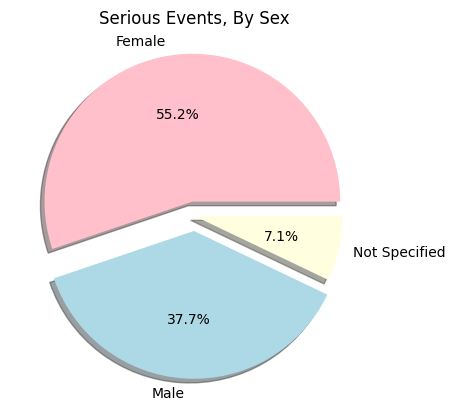

In [354]:
#pie chart 2 (Serious Cases, by sex)
plt.pie(glp1_s_sum1['Case ID'],labels=glp1_s_sum1['Sex'],
        autopct='%1.1f%%',colors=['pink','lightblue','lightyellow'],
        explode=[0.1,0.1,0],shadow=True)
plt.title('Serious Events, By Sex')
%matplotlib inline

Mostly Female at over 55%

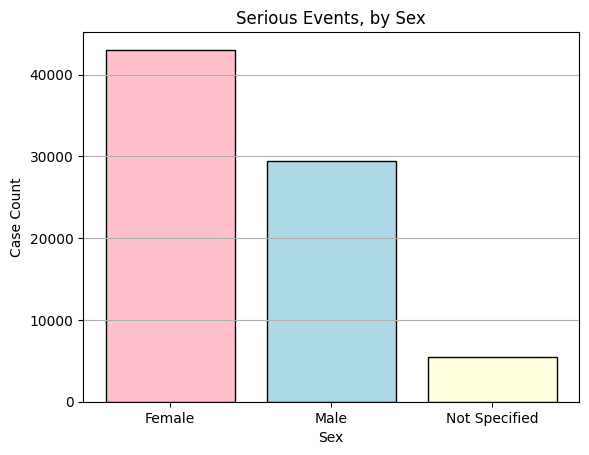

In [355]:
#bar chart 2 (Serious cases, by Sex)
plt.bar(glp1_s_sum1['Sex'],glp1_s_sum1['Case ID'],
        color=['pink','lightblue','lightyellow'],edgecolor='black')
plt.title('Serious Events, by Sex')
plt.xlabel('Sex')
plt.ylabel('Case Count')
plt.grid(axis='y')
%matplotlib inline

Female cases outnumber Male, with significant unknown

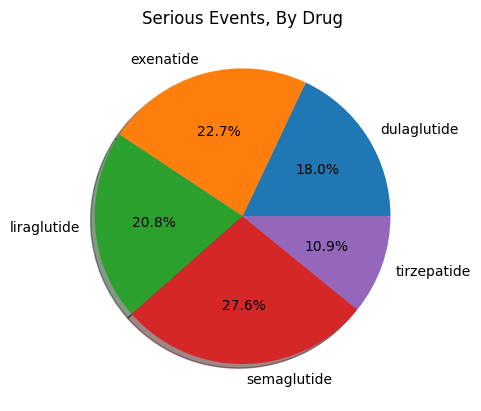

In [356]:
#pie chart 3 (Serious Cases, by Drug)
#1=dulaglutide (2014), 2=exenatide (2005), 3=liraglutide (2010), 4=semaglutide (2017), 5=tirzepatide (2022)
plt.pie(glp1_s_sum2['Case ID'],labels=['dulaglutide','exenatide','liraglutide','semaglutide','tirzepatide'],
        autopct='%1.1f%%',shadow=True)
plt.title('Serious Events, By Drug')
%matplotlib inline

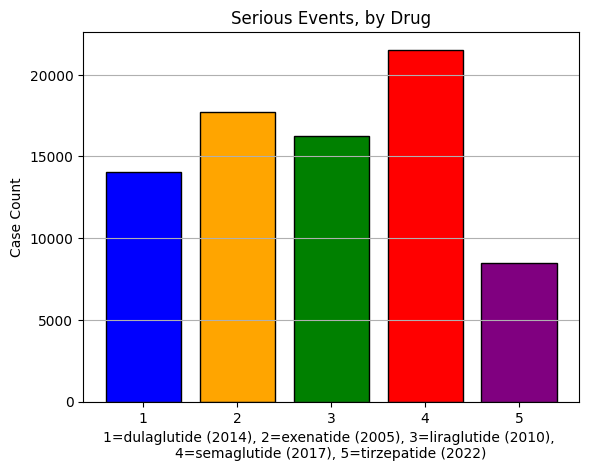

In [357]:
#bar chart 3 (Serious cases, by Drug)
plt.bar(glp1_s_sum2['api1'],glp1_s_sum2['Case ID'],
        edgecolor='black',color=['blue','orange','green','red','purple'])
plt.title('Serious Events, by Drug')
plt.xlabel('1=dulaglutide (2014), 2=exenatide (2005), 3=liraglutide (2010), \n4=semaglutide (2017), 5=tirzepatide (2022)')
plt.ylabel('Case Count')
plt.grid(axis='y')
%matplotlib inline

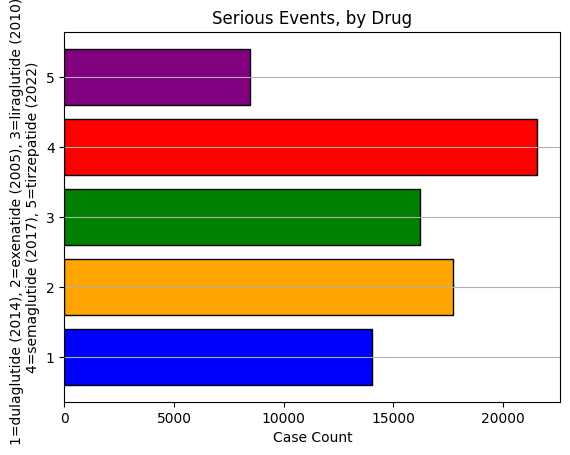

In [358]:
#bar chart 3 (Serious cases, by Drug)
plt.barh(glp1_s_sum2['api1'],glp1_s_sum2['Case ID'],
        edgecolor='black',color=['blue','orange','green','red','purple'])
plt.title('Serious Events, by Drug')
plt.ylabel('1=dulaglutide (2014), 2=exenatide (2005), 3=liraglutide (2010), \n4=semaglutide (2017), 5=tirzepatide (2022)')
plt.xlabel('Case Count')
plt.grid(axis='y')
%matplotlib inline

From both the pie and bar graphs, we can see that there are reported cases with all GLP-1s.

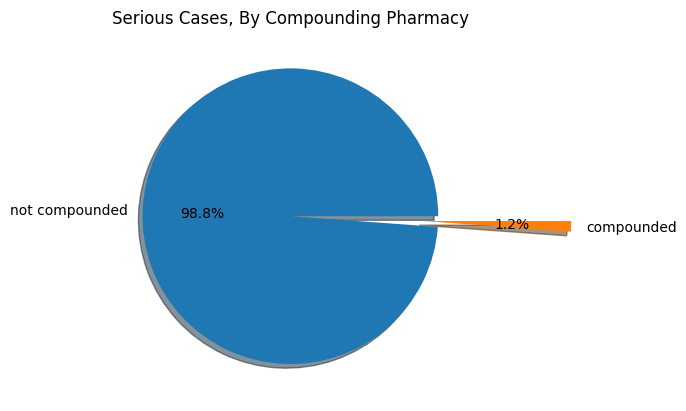

In [359]:
#pie chart 4 (Serious Cases, by Compounding)
plt.pie(glp1_s_sum3['Case ID'],labels=['not compounded','compounded'],
        autopct='%1.1f%%',shadow=True,explode=[0,0.9])
plt.title('Serious Cases, By Compounding Pharmacy')
%matplotlib inline

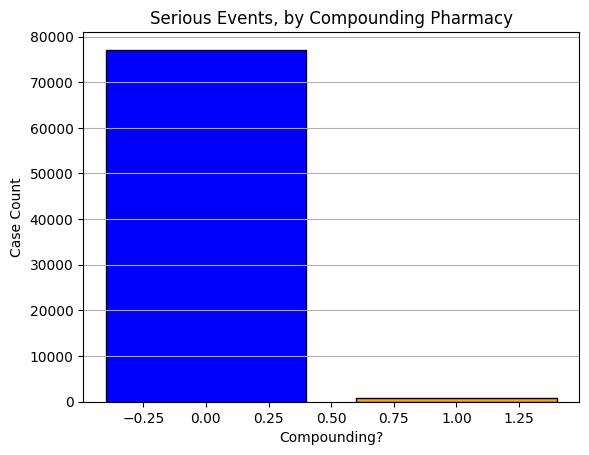

In [360]:
#bar chart 4 (Serious cases, by Compounding)
plt.bar(glp1_s_sum3['CMPD'],glp1_s_sum3['Case ID'],
        edgecolor='black',color=['blue','orange'])
plt.title('Serious Events, by Compounding Pharmacy')
plt.xlabel('Compounding?')
plt.ylabel('Case Count')
plt.grid(axis='y')
%matplotlib inline

From both pie and bar graphs, we see that compounded GLP1s make up a very small proportion of reported serious cases, at 1.2%.

In [361]:
#pandas series, by sex
print(glp1_s_sum1)

             Sex  Case ID
0         Female    43060
1           Male    29430
2  Not Specified     5528


Of all serious events, many more were reported by females (43k) than males (29k). There was a substantial number of cases without sex data (5.5k)

In [362]:
#pandas series, by drug
print(glp1_s_sum2)
print('1=dulaglutide (2014), 2=exenatide (2005), 3=liraglutide (2010), 4=semaglutide (2017), 5=tirzepatide (2022)')

   api1  Case ID
0     1    14026
1     2    17716
2     3    16245
3     4    21548
4     5     8483
1=dulaglutide (2014), 2=exenatide (2005), 3=liraglutide (2010), 4=semaglutide (2017), 5=tirzepatide (2022)


Of all serious events, most were related to semaglutide (21.5k), least was tirzepatide (8.5k). This is most likely driven by prescribing patterns and reflecting marketshare of various GLP1s.

In [363]:
#pandas series, by compounded
print(glp1_s_sum3)
a=glp1_s_sum3['Case ID'][1]
b=glp1_s_sum3['Case ID'][0]
c=round((a/(a+b))*100,2)
print('a:',a,'b:',b,'c:',c)
print(c,'% of serious events were compounded')

   CMPD  Case ID
0     0    77117
1     1      901
a: 901 b: 77117 c: 1.15
1.15 % of serious events were compounded


1.2% of serious events were from compounded GLP1s

In [364]:
#pandas series, by sex+drugs
print(glp1_s_sum5)

Sex            api1
Female         1        6676
               2        9551
               3        8983
               4       12787
               5        5063
Male           1        6025
               2        7446
               3        6200
               4        7564
               5        2195
Not Specified  1        1325
               2         719
               3        1062
               4        1197
               5        1225
Name: Case ID, dtype: int64


When broken down by sex and drug, the above pattern continue to hold: Females outnumber males in reports for every drug, though the difference is most pronounced for semaglutide, at 7.6k for males and 12.8k for females (almost double). Unsure why this is. Perhaps it is due to semaglutide's unique availability in oral dosage form.

In [365]:
#pandas series, by sex+drug+cpds
print(glp1_s_sum4)

Sex            api1  CMPD
Female         1     0        6628
                     1          48
               2     0        9541
                     1          10
               3     0        8953
                     1          30
               4     0       12334
                     1         453
               5     0        4887
                     1         176
Male           1     0        6005
                     1          20
               2     0        7441
                     1           5
               3     0        6191
                     1           9
               4     0        7454
                     1         110
               5     0        2170
                     1          25
Not Specified  1     0        1323
                     1           2
               2     0         719
               3     0        1062
               4     0        1186
                     1          11
               5     0        1223
                     1       

When broken down by sex, drug, and compounded flag, we see that there are reported serious events coming from compounded glp1s from every drug.

### Part 3: Checking for Missing Data/Cleaning Age
* pull in only age in years
* change to numeric, force other errors to NA
* exclude NAs
* filter out only age from 1-150
* cleaned up dataset is "glp1a"  
**Use Age_Years Column, updated**

In [366]:
glp1['Patient Age']=glp1['Patient Age'].str.replace(' YR','')

In [367]:
glp1['Patient Age']=pd.to_numeric(glp1['Patient Age'],errors='coerce')

In [368]:
#analyze missing NAs, part3
#print(data.isnull().sum())
print('NAs per column (focus on age)\n',glp1.isnull().sum())
print('----------\n','Shape of Dataset: \n',glp1.shape)

NAs per column (focus on age)
 Case ID                                    0
Suspect Product Names                      0
Suspect Product Active Ingredients         0
Reason for Use                             0
Reactions                                  0
Serious                                    0
Outcomes                                   0
Sex                                        0
Event Date                                 0
Latest FDA Received Date                   0
Case Priority                              0
Patient Age                           145158
Patient Weight                             0
Sender                                     0
Reporter Type                              0
Report Source                              0
Concomitant Product Names                  0
Latest Manufacturer Received Date          0
Initial FDA Received Date                  0
Country where Event occurred               0
Reported to Manufacturer?                  0
Manufacturer Control Num

New cleaned age column has 135k NA compared to 145K from before, thanks!

In [369]:
glp1b=glp1.dropna(subset=['Age_Years']) #valid age only
glp1a=glp1b[(glp1b['Age_Years'] >0) & (glp1b['Age_Years'] < 150)].copy() #realistic age values only (1-150)
glp1a['Age_Years']

,Age_Years
0,80.0
1,80.0
2,85.0
3,71.0
4,63.0
...,...
300549,55.0
300550,32.0
300551,49.0
300552,74.0


In [370]:
#checking descriptive statistics on glp1a['Age_years']
glp1a['Age_Years'].describe()

,Age_Years
count,166029.000000
mean,58.439152
std,12.880129
min,0.002740
25%,50.000000
50%,60.000000
75%,68.000000
max,121.000000


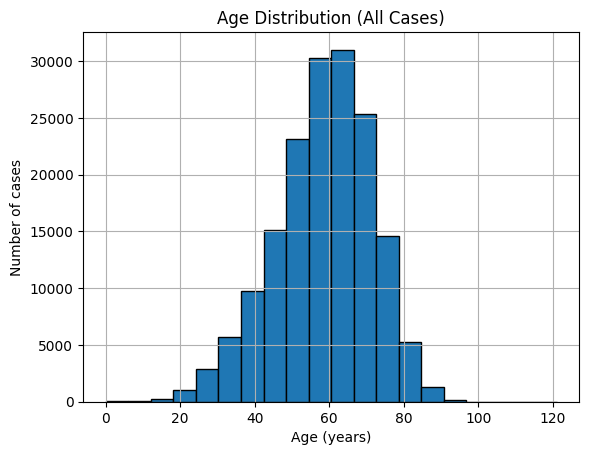

In [371]:
#histogram 1 (age distribution, all cases)
#quick check on distribution of age
glp1a['Age_Years'].hist(bins=20,edgecolor='black')
plt.title('Age Distribution (All Cases)')
plt.xlabel("Age (years)")
plt.ylabel("Number of cases")
plt.show()


This shows that age for all cases is a normally distributed continuous variable. There does not appear to be any skewness; symmetric normal distribution. Visually, the mean is around 60 (actual is 58).

In [372]:
print('NAs per column (focus on age)\n',glp1.isnull().sum())
print('----------\n','Shape of Dataset: \n',glp1.shape)

NAs per column (focus on age)
 Case ID                                    0
Suspect Product Names                      0
Suspect Product Active Ingredients         0
Reason for Use                             0
Reactions                                  0
Serious                                    0
Outcomes                                   0
Sex                                        0
Event Date                                 0
Latest FDA Received Date                   0
Case Priority                              0
Patient Age                           145158
Patient Weight                             0
Sender                                     0
Reporter Type                              0
Report Source                              0
Concomitant Product Names                  0
Latest Manufacturer Received Date          0
Initial FDA Received Date                  0
Country where Event occurred               0
Reported to Manufacturer?                  0
Manufacturer Control Num

## Part 2: Filtering and Selecting Data
* Filter out serious vs non-serious events (rows)
* Select only relevant variables (columns)

In [373]:
#filter out serious events and relevant columns
var=['Case ID','Serious','Outcomes','Sex','Age_Years','Patient Weight','CMPD','api1']
glp1a_s=glp1a.query("Serious == 'Serious'")[var] #valid age, serious events
glp1a_ns=glp1a.query("Serious == 'Non-Serious'")[var] #valid age, non-serious events


In [374]:
print('Serious Events, Valid Age\n',glp1a_s)

Serious Events, Valid Age
          Case ID  Serious                                Outcomes  \
3       25140677  Serious                            Hospitalized   
7       25139513  Serious             Other Outcomes;Hospitalized   
17      25138176  Serious                          Other Outcomes   
20      25140295  Serious      Required Intervention;Hospitalized   
21      25137010  Serious                          Other Outcomes   
...          ...      ...                                     ...   
300548  24910845  Serious                          Other Outcomes   
300549  24904201  Serious                            Hospitalized   
300550  24642147  Serious  Life Threatening;Required Intervention   
300551  24398076  Serious                            Hospitalized   
300553  24129001  Serious                   Disabled;Hospitalized   

                  Sex  Age_Years Patient Weight  CMPD  api1  
3              Female       71.0  Not Specified     0     1  
7              Femal

In [375]:
print('Non-Serious Events, valid age\n',glp1a_ns)

Non-Serious Events, valid age
          Case ID      Serious     Outcomes     Sex  Age_Years Patient Weight  \
0       25142581  Non-Serious  Non-Serious    Male       80.0  Not Specified   
1       25142580  Non-Serious  Non-Serious  Female       80.0  Not Specified   
2       25141349  Non-Serious  Non-Serious    Male       85.0  Not Specified   
4       25140673  Non-Serious  Non-Serious  Female       63.0  Not Specified   
5       25140096  Non-Serious  Non-Serious  Female       42.0  Not Specified   
...          ...          ...          ...     ...        ...            ...   
300530  21060519  Non-Serious  Non-Serious  Female       55.0  Not Specified   
300540  21043000  Non-Serious  Non-Serious  Female       28.0  Not Specified   
300543  21035667  Non-Serious  Non-Serious  Female       40.0  Not Specified   
300547  25085870  Non-Serious  Non-Serious    Male       50.0        94.5 KG   
300552  24327525  Non-Serious  Non-Serious  Female       74.0        86.4 KG   

        

query is a useful shortcut!

## Part 4: Groupby for Scientific Insights
* Focus on Serious Events only
* Group by: a) sex,
b) drug;
c) sex&drug
* lamda fxn for quartiles

In [376]:
#serious events, grouped by sex
glp1a_s_sum1 = glp1a_s.groupby(['Sex'])['Age_Years'].agg(['mean','median','min','max','size',
 ('q25',lambda x: x.quantile(0.25)),('q75',lambda x: x.quantile(0.75)) ])
print('\n \tAge of Serious Events, by Sex: \n',glp1a_s_sum1)

glp1a_s_sum2 = glp1a_s.groupby(['api1'])['Age_Years'].agg(['mean','median','min','max','size',
     ('q25',lambda x: x.quantile(0.25)),('q75',lambda x: x.quantile(0.75)) ])
print('\n \tAge of Serious Events, by drug: \n',glp1a_s_sum2)

glp1a_s_sum3 = glp1a_s.groupby(['Sex','api1'])['Age_Years'].agg(['mean','median','min','max','size',
     ('q25',lambda x: x.quantile(0.25)),('q75',lambda x: x.quantile(0.75)) ])
print('\n \tAge of Serious Events, by sex and drug: \n',glp1a_s_sum3)

print('1=dulaglutide (2014), 2=exenatide (2005), 3=liraglutide (2010), 4=semaglutide (2017), 5=tirzepatide (2022)')



 	Age of Serious Events, by Sex: 
                     mean  median       min    max   size   q25   q75
Sex                                                                 
Female         57.229779    59.0  0.071233  104.0  28234  48.0  67.0
Male           60.770536    62.0  0.002740  100.0  19827  53.0  70.0
Not Specified  57.858334    59.0  0.008219  100.0    954  49.0  68.0

 	Age of Serious Events, by drug: 
            mean  median       min    max   size   q25   q75
api1                                                       
1     62.174575    63.0  0.500000  100.0   7403  54.0  72.0
2     60.359273    61.0  0.002740  100.0  11860  53.0  68.0
3     57.931726    60.0  0.002740  104.0  11023  50.0  67.0
4     57.899674    60.0  0.076923  100.0  13797  48.0  69.0
5     53.194911    54.0  0.008219  100.0   4932  42.0  64.0

 	Age of Serious Events, by sex and drug: 
                          mean     median        min         max  size   q25  \
Sex           api1                    

##Pivot Tables

In [377]:
#drug x sex
print('Serious Reactions, drug x sex')
print(glp1a_s.pivot_table(index='api1',columns='Sex',values='Age_Years',aggfunc=['mean','median']))
print('1=dulaglutide (2014), 2=exenatide (2005), 3=liraglutide (2010), 4=semaglutide (2017), 5=tirzepatide (2022)')

Serious Reactions, drug x sex
           mean                          median                    
Sex      Female       Male Not Specified Female  Male Not Specified
api1                                                               
1     61.718110  62.541844     63.841880   63.0  63.0     63.500000
2     59.864249  60.942829     63.357785   60.0  62.0     66.787671
3     56.275876  60.285085     53.627702   58.0  62.0     55.000000
4     56.292161  60.606768     55.835003   58.0  62.0     59.000000
5     51.065107  58.043208     52.755837   52.0  59.0     55.000000
1=dulaglutide (2014), 2=exenatide (2005), 3=liraglutide (2010), 4=semaglutide (2017), 5=tirzepatide (2022)


In [378]:
glp1a_s.columns

Index(['Case ID', 'Serious', 'Outcomes', 'Sex', 'Age_Years', 'Patient Weight',
       'CMPD', 'api1'],
      dtype='object')

In [379]:
#drug x compounded
print('Serious Reactions, drug x compounded')
print(glp1a_s.pivot_table(index='api1',columns='CMPD',values='Age_Years',aggfunc=['mean','median']))
print('Compounded, CMPD (0=no, 1=yes)')
print('1=dulaglutide (2014), 2=exenatide (2005), 3=liraglutide (2010), 4=semaglutide (2017), 5=tirzepatide (2022)')

Serious Reactions, drug x compounded
           mean            median      
CMPD          0          1      0     1
api1                                   
1     62.212354  57.974747   63.0  58.0
2     60.357165  62.142857   61.0  62.0
3     57.960954  49.482456   60.0  47.5
4     58.206582  50.521628   60.0  51.0
5     53.370186  48.959687   55.0  48.0
Compounded, CMPD (0=no, 1=yes)
1=dulaglutide (2014), 2=exenatide (2005), 3=liraglutide (2010), 4=semaglutide (2017), 5=tirzepatide (2022)


compounded age appears to trend consistently lower than non-compounded, for all drugs

In [380]:
glp1a_s.groupby('CMPD')['Age_Years'].describe()

,count,mean,std,min,25%,50%,75%,max
CMPD,,,,,,,,
0,48150.0,58.814323,13.648466,0.00274,50.0,60.0,68.833333,104.0
1,865.0,50.878824,14.255891,0.09863,41.0,52.0,61.000000,89.0


In [381]:
#apologies I couldn't help myself, I wonder if the age diff is statistically sig
from scipy import stats
sample1=glp1a_s[glp1a_s['CMPD']==0]['Age_Years'] #non-compounded
sample2=glp1a_s[glp1a_s['CMPD']==1]['Age_Years'] #compounded
print('sample1, non-compounded',sample1)
sample1.describe()
print('sample2, compounded',sample2)

sample1, non-compounded 3         71.0
7         44.0
17        66.0
20        74.0
21        83.0
          ... 
300371    46.0
300444    50.0
300445    29.0
300522    61.0
300537    44.0
Name: Age_Years, Length: 48150, dtype: float64
sample2, compounded 1687      66.0
2394      34.0
2823      48.0
3303      61.0
3827      66.0
          ... 
300548    73.0
300549    55.0
300550    32.0
300551    49.0
300553    32.0
Name: Age_Years, Length: 865, dtype: float64


In [382]:
t_statistic, p_value=stats.ttest_ind(sample1,sample2)
print('t-statistic: ',t_statistic)
print('p-value: ',p_value)

t-statistic:  16.9349574563199
p-value:  3.785736685468843e-64


It's statistically significant??!! Did I do that right? Let's check histogram

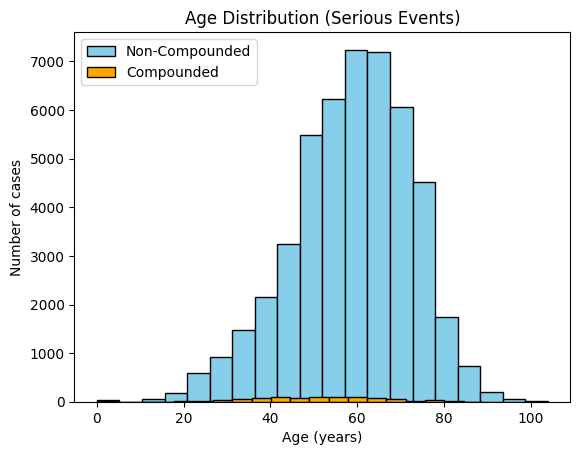

In [383]:
import matplotlib.pyplot as plt
plt.hist(sample1,color='skyblue',bins=20,edgecolor='black',label='Non-Compounded') #non-compounded
plt.hist(sample2,color='orange',bins=20,edgecolor='black',label='Compounded') #compounded
plt.title('Age Distribution (Serious Events)')
plt.xlabel("Age (years)")
plt.ylabel("Number of cases")
plt.legend()
plt.show()

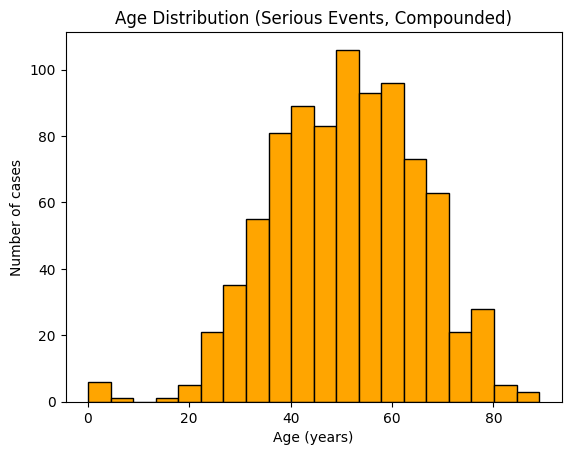

In [384]:
plt.hist(sample2,color='orange',bins=20,edgecolor='black') #compounded
plt.title('Age Distribution (Serious Events, Compounded)')
plt.xlabel("Age (years)")
plt.ylabel("Number of cases")
plt.show()

From both histograms, the age distribution when split by compounding, remain mostly symmetric normal with no skew. There appears to be strange outliers at both tails, probably data quality issues to be adjudicated.

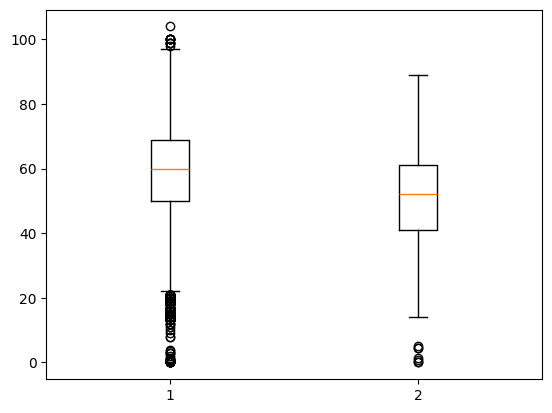

In [385]:
plt.boxplot([sample1,sample2])
plt.show()

So I think the two samples are statistically significant per the two-indept t-test. Unfortunately I don't know if this is a valid test to use as I'm not sure if all the assumptions are met, in addition to the two samples having very different sample size. My personal opinion on this is that this difference is probably real, as people on the compounded versions of GLP1s may be younger and taking it for...cosmetic...reasons. (and risking SAE events along with it)

In [386]:
#drug x
print('Serious Reactions, drug x compounded and sex')
print(glp1a_s.pivot_table(index='api1',columns=('CMPD','Sex'),values='Age_Years',aggfunc=['mean','median']))
print('Compounded, CMPD (0=no, 1=yes)')
print('1=dulaglutide (2014), 2=exenatide (2005), 3=liraglutide (2010), 4=semaglutide (2017), 5=tirzepatide (2022)')

Serious Reactions, drug x compounded and sex
           mean                                                               \
CMPD          0                                   1                            
Sex      Female       Male Not Specified     Female       Male Not Specified   
api1                                                                           
1     61.785632  62.553136     63.759657  56.398551  60.473684          83.0   
2     59.867068  60.933895     63.357785  57.777778  70.000000           NaN   
3     56.321901  60.286292     53.627702  46.321839  59.666667           NaN   
4     56.691618  60.700161     55.896461  49.150948  56.141509          52.0   
5     51.229215  58.080142     52.851299  48.076600  55.833333          35.0   

     median                                                 
CMPD      0                          1                      
Sex  Female  Male Not Specified Female  Male Not Specified  
api1                                               

would be interesting to run an ANOVA (age~compounded*sex*api) and see which covariates come up sig

With regards to age:
1) Overall, most of the reported age centers around 57 for female and 61 for male, with females being overall marginally younger. This is likely just a reflection of demographics.
2) mean/median are generally close, so either one is a good measure of central tendency
3) Strange observation for females on tirzepatide - mean of 51 (med of 52) is younger than other groups. Are younger women more susceptible to serious AEs from tirzepatide than other GLP1s? (tirzepatide is unique in that it is a dual GIP/GLP1.)
4) Other interesting observations:
  a) There are many infants less than a year old on GLP1s?
  b) There's centanarians on GLP1s...
  c) Will be interesting to run an analysis and filter for peds popln <12, since they are off label. It is striking the number of young people afflicted with T2DB and/or obesity. (run analysis on age<30?)
5) unknown if above conclusion will hold after further cleanining of age

Overall Conclusions:

Female outnumber males in reporting. This is likely due to women having more general contact with the healthcare system, and their more likely to report AEs. This pattern comports with other compounds as well - women are just more likely to report health concerns than men. This is concerning particularly for men, since many of these side effects are severe and may involve hospitalizations. There are two interesting observations:
1) With regards to elevated semaglutide reports in women - are more women taking this, or are women more susceptible to SAEs from this? Semaglutide's available in oral form, with unique SNAC enabling GI penetration. Is this driving the higher diff in rates b/w men and women?
2) Separately, the reports for women on tirzepatide skews younger than usual - is this driven by its dual GLP-1 and GIP actions?

## Testing/scratch Area

(note to self: https://jamanetwork.com/journals/jamanetworkopen/fullarticle/2832114 Tsipas S, Khan T, Loustalot F, Myftari K, Wozniak G. Spending on Glucagon-Like Peptide-1 Receptor Agonists Among US Adults. JAMA Netw Open. 2025;8(4):e252964. doi:10.1001/jamanetworkopen.2025.2964 for Rx spending $$ as proxy for relative rates??)

Caveats:
* No rate information can be inferred without total Rx dispensed
* Correlation is not causation

Disclaimer:
Please note that this was developed for academic coursework, and is intended for educational purposes ONLY. The information provided does NOT imply causation, safety, or efficacy. This is not medical advice and should not be used to diagnose, treat, cure, or prevent any disease. Always consult a qualified healthcare professional for any health-related concerns. No guarantees are made regarding the completeness, accuracy, or timeliness of the information provided. Full disclaimer: (https://www.fda.gov/drugs/fdas-adverse-event-reporting-system-faers/fda-adverse-event-reporting-system-faers-public-dashboard)

## Questions/comments
1) Any suggestions on doing log-scale axis and tickmarks? For instance, in a scatterplot, what's a good way to plot the y-axis in log scale, with the corresponding tickmarks?